# Import Thư Viện

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Load Dataset

In [21]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


# Dataset - scaling

In [22]:
# Remove rows with missing values and select only numeric columns
penguins_clean = penguins_df.dropna()
penguins_numeric = penguins_clean.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X = scaler.fit_transform(penguins_numeric)
penguins_preprocessed = pd.DataFrame(data=X, columns=penguins_numeric.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.897723,0.777263,-0.126893,-0.572233
1,-0.824265,0.117037,-0.107872,-0.509923
2,-0.677349,0.421757,-0.073633,-1.195338
3,-1.338472,1.081983,-0.081242,-0.946096
4,-0.860994,1.742210,-0.092655,-0.696854
5,-0.934452,0.320183,-0.126893,-0.728010
6,-0.879359,1.234343,-0.073633,0.580511
7,-0.365152,1.539063,18.206039,0.050871
8,-0.530433,0.218610,-0.123089,-1.257649
9,-0.989546,2.046930,-0.088850,-0.509923


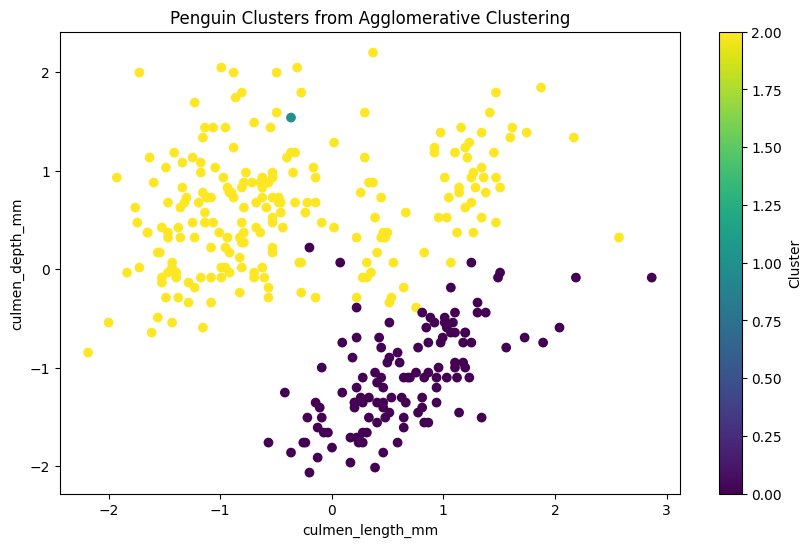

In [ ]:
ac = AgglomerativeClustering(3, linkage='average')
clusters = ac.fit_predict(penguins_preprocessed)

# Hiển thị các cụm sau khi phân cấp theo cách tiếp cận của scikit-learn
plt.figure(figsize=(10, 6))
plt.scatter(penguins_preprocessed.iloc[:, 0], penguins_preprocessed.iloc[:, 1], c=clusters, cmap='viridis')
plt.title("Penguin Clusters from Agglomerative Clustering")
plt.xlabel(penguins_preprocessed.columns[0])
plt.ylabel(penguins_preprocessed.columns[1])
plt.colorbar(label="Cluster")
plt.show()

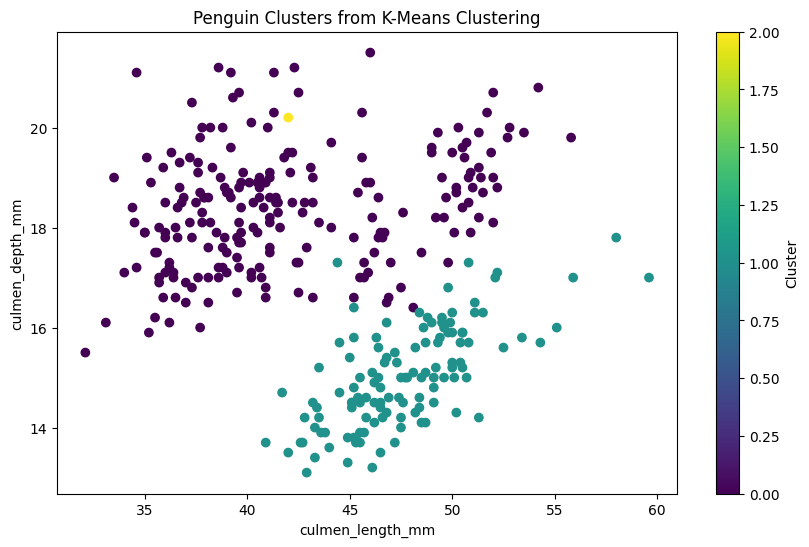

In [16]:
km = KMeans(3, random_state=42)
km_clusters = km.fit_predict(penguins_preprocessed)

# Hiển thị kết quả sau khi phân cụm K-mean
plt.figure(figsize=(10, 6))
plt.scatter(penguins_numeric.iloc[:, 0], penguins_numeric.iloc[:, 1], c=km_clusters, cmap='viridis')
plt.title("Penguin Clusters from K-Means Clustering")
plt.xlabel(penguins_numeric.columns[0])
plt.ylabel(penguins_numeric.columns[1])
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# So sánh kết quả phân cụm của 2 mô hình với phương pháp tính Silhouette
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(penguins_preprocessed, km_clusters))
print("Agg Clustering: ", silhouette_score(penguins_preprocessed, clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.49630047442464464
Agg Clustering:  0.4950215987385319
